## Importing packages which are needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Machine Learning\HomeProject.csv")
df.head(50)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


There are too many wrong data in the dataset which should be removed. For example the row 43 we have a 'NaN' objet in "Address".

In [3]:
counter = 0
for item in df.Address:
    if str(item) == 'nan':
        df.drop([counter], inplace=True)
    counter += 1

df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


Now I want to examie the correlations between variables using pandas library and plot a matrix for checking which variables have the most correlation.

In [5]:
cdf = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address']]

C:\Users\USER\AppData\Local\Temp\ipykernel_5908\488450418.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


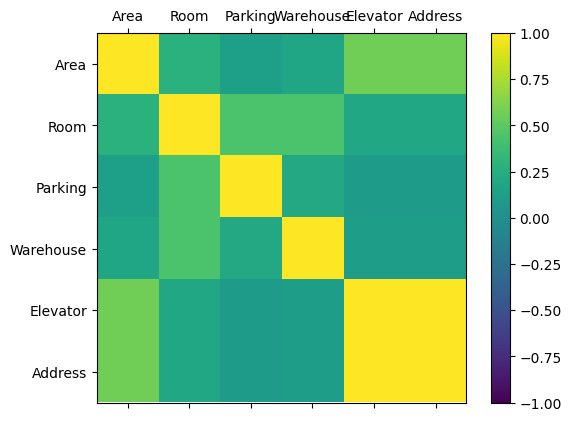

In [12]:
cor = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cdf)
ax.set_yticklabels(cdf)
plt.show()

<Axes: >

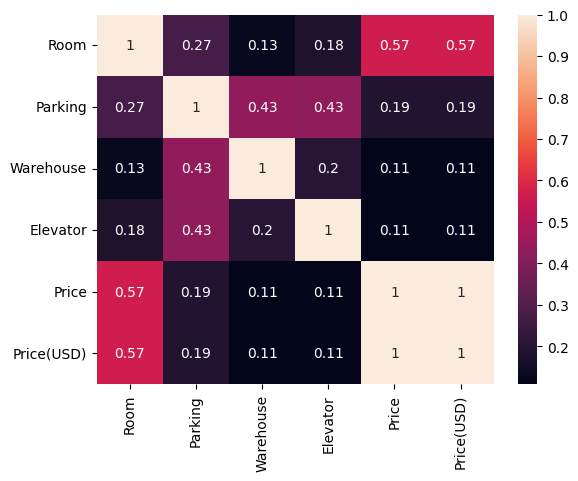

In [13]:
import seaborn as sns

plt.figure()
sns.heatmap(cor, annot=True)

I decide to remove some features in my new dataset like "Elevator", "Warehouse" and "Parking".

In [30]:
cdf = df[['Area', 'Room','Address', 'Price']]
cdf = cdf.sort_values(by=['Area'])
cdf.head(10)

,Area,Room,Address,Price
807,"1,000",2,Damavand,7.000000e+09
709,"16,160,000,000",3,Pasdaran,1.616000e+10
2802,"2,550,000,000",2,Central Janatabad,2.550000e+09
570,"3,310,000,000",2,Ostad Moein,3.310000e+09
2171,"3,600",2,Shahryar,9.720000e+09
1604,"8,400,000,000",2,Gheitarieh,8.700000e+09
899,100,2,Shahr-e-Ziba,3.800000e+09
1846,100,2,Jeyhoon,2.300000e+09
900,100,2,East Ferdows Boulevard,3.500000e+09
1130,100,2,Shahr-e-Ziba,3.300000e+09


Now I should change the 'string' values to numbers because we can't work with categorical objects in dataset.

In [31]:
from sklearn.preprocessing import LabelEncoder
def Encoder(df):
        columns = list(df.select_dtypes(include=['category','object']))
        Encode = LabelEncoder()
        for feature in columns:
            try:
                df[feature] = Encode.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
    

Encoder(cdf)

,Area,Room,Address,Price
807,0,2,31,7.000000e+09
709,1,3,118,1.616000e+10
2802,2,2,26,2.550000e+09
570,3,2,111,3.310000e+09
2171,4,2,157,9.720000e+09
...,...,...,...,...
23,242,2,99,2.277000e+09
456,242,3,106,4.190000e+09
1528,242,2,122,4.200000e+09
1602,242,1,57,8.400000e+09


In [32]:
x = np.asarray(cdf)
x = x[:-6]
print(x[:10])


[[0.000e+00 2.000e+00 3.100e+01 7.000e+09]
 [1.000e+00 3.000e+00 1.180e+02 1.616e+10]
 [2.000e+00 2.000e+00 2.600e+01 2.550e+09]
 [3.000e+00 2.000e+00 1.110e+02 3.310e+09]
 [4.000e+00 2.000e+00 1.570e+02 9.720e+09]
 [5.000e+00 2.000e+00 5.700e+01 8.700e+09]
 [6.000e+00 2.000e+00 1.460e+02 3.800e+09]
 [6.000e+00 2.000e+00 7.400e+01 2.300e+09]
 [6.000e+00 2.000e+00 4.000e+01 3.500e+09]
 [6.000e+00 2.000e+00 1.460e+02 3.300e+09]]


In [44]:
y = np.asarray(df[['Price']])
print(y[0:10])


[[1.850e+09]
 [1.850e+09]
 [5.500e+08]
 [9.025e+08]
 [7.000e+09]
 [2.050e+09]
 [6.000e+08]
 [2.150e+09]
 [4.930e+08]
 [2.370e+09]]


It is important to normalize the dataset for better response: (All features together)

In [36]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.67343956, -0.10703856, -1.46983896,  0.19949908],
       [-1.66160909,  1.20942149,  0.25912086,  1.32750091],
       [-1.64977862, -0.10703856, -1.56920447, -0.34849307],
       [-1.63794815, -0.10703856,  0.12000915, -0.2549034 ],
       [-1.62611769, -0.10703856,  1.03417181,  0.53445159]])

In [72]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

In [71]:
# This is for multiple regression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2764, 4) (2764, 1)
Test set: (692, 4) (692, 1)


## Simple Linear Regression

At first I will plot and examine all the features in my dataset:

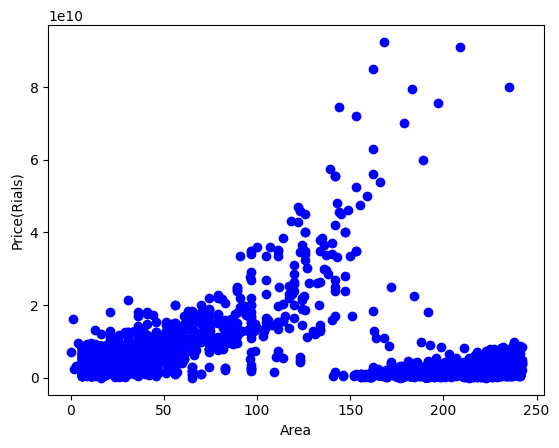

In [74]:
# Area against Price
plt.scatter(train.Area, train.Price, color='blue')
plt.xlabel("Area")
plt.ylabel("Price(Rials)")
plt.show()

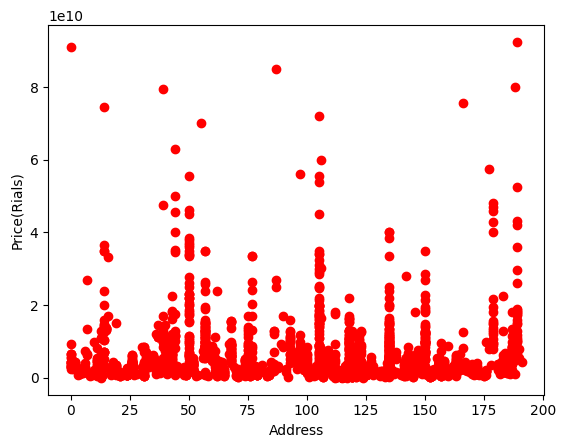

In [75]:
# Address against Price 
plt.scatter(train.Address, train.Price, color='red')
plt.xlabel("Address")
plt.ylabel("Price(Rials)")
plt.show()

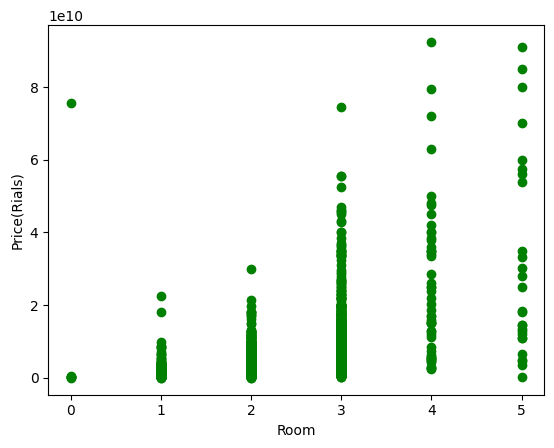

In [76]:
# Room Against Price
plt.scatter(train.Room, train.Price, color='green')
plt.xlabel("Room")
plt.ylabel("Price(Rials)")
plt.show()

### Modeling:

Lets Model the linear regression for Area and Price:

In [79]:
# Area against Price
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Area']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-21018401.05933874]]
Intercept:  [8.4028327e+09]


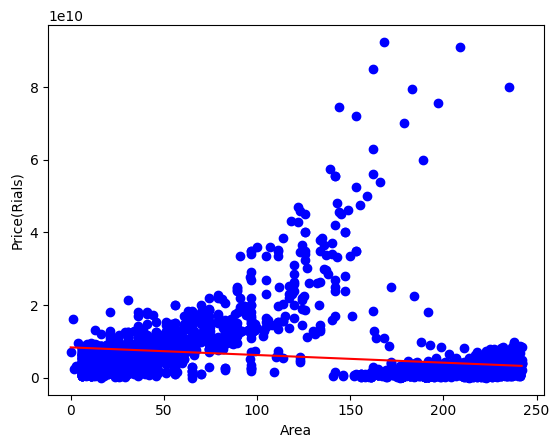

In [81]:
plt.scatter(train.Area, train.Price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Area")
plt.ylabel("Price(Rials)")
plt.show()

### Evaluation of Model ( Area & Price)

In [82]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Area']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.4f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.4f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.4f" % r2_score(test_y , test_y_) )

Mean absolute error: 4081987852.2480
Residual sum of squares (MSE): 60372187609125150720.0000
R2-score: 0.0327


In [84]:
# Address against Price
train_x = np.asanyarray(train[['Address']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-11654783.55201847]]
Intercept:  [6.66072354e+09]


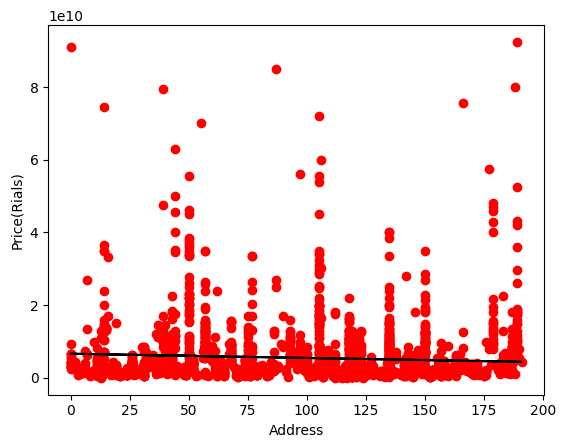

In [85]:
plt.scatter(train.Address, train.Price,  color='red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-k')
plt.xlabel("Address")
plt.ylabel("Price(Rials)")
plt.show()

### Evaluation of Model ( Address & Price ) :

In [86]:
test_x = np.asanyarray(test[['Address']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.4f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.4f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.4f" % r2_score(test_y , test_y_))

Mean absolute error: 4523131215.5827
Residual sum of squares (MSE): 61959231644255526912.0000
R2-score: 0.0073


In [87]:
# Room against Price
train_x = np.asanyarray(train[['Room']])
train_y = np.asanyarray(train[['Price']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[6.00411993e+09]]
Intercept:  [-7.10166459e+09]


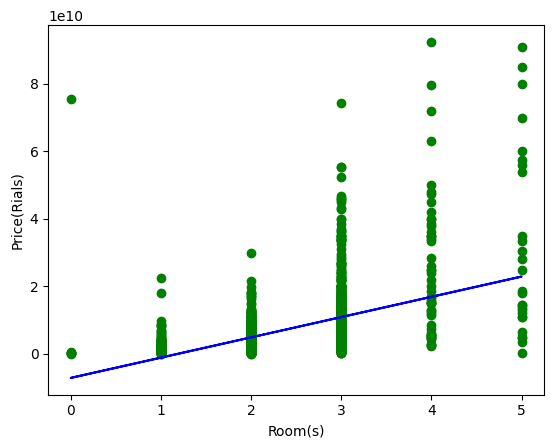

In [89]:
plt.scatter(train.Room, train.Price,  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b')
plt.xlabel("Room(s)")
plt.ylabel("Price(Rials)")
plt.show()

### Evaluation of Model ( Room & Price ) :

In [90]:
test_x = np.asanyarray(test[['Room']])
test_y = np.asanyarray(test[['Price']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.4f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.4f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.4f" % r2_score(test_y , test_y_))

Mean absolute error: 3805207767.3867
Residual sum of squares (MSE): 38808586550612393984.0000
R2-score: 0.3782


## Multiple Linear Regression

In [77]:
regr.fit(x_train, y_train)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-7.32221680e+08 -4.41609709e+08  6.00983919e+07  4.98592475e+08]]


In [78]:
yhat= regr.predict(x_test)
print("Residual Sum of Squares: %.4f" % np.mean((yhat - y_test ) ** 2))
print('Variance Score of Train data: %.4f' % regr.score(x_train, y_train))
print('Variance Score of Test data: %.4f' % regr.score(x_test, y_test))

Residual Sum of Squares: 92900798670220410880.0000
Variance Score of Train data: 0.0109
Variance Score of Test data: 0.0019
